## Degree 4 Gaussian moment secants are defective

For fixed dimension $n$, this script calculates the maximum rank $m$ up to which secants of the degree-$4$ Gaussian moment variety have the expected dimension. This maximum rank appears to be 1, independent of $m$.

In [2]:
using Pkg; Pkg.activate("identifiability");
using DynamicPolynomials, SparseArrays, Plots, DataFrames, CSV, JLD2, FileIO;
const d = 4;
const moments_d(q, ℓ) = ℓ^4 + 6*q*ℓ^2 + 3*q^2; # degree 4 moments  
const f(q, ℓ) = ℓ^2 + q;
const g(q, ℓ) = ℓ^3 + 3*q*ℓ;
include("gaussian-moments.jl")

  Activating project at `~/Nextcloud/research/gaussian-mixtures/gaussian-identifiability/code/identifiability`


#45 (generic function with 1 method)

In [3]:
filepath_csv = "../data/secant-dimensions-deg4.csv";
filepath_jld = "../data/skewsecants-deg4.jld2";

In [4]:
n_min = 2;
n_max = 20;
@polyvar X[1:n_max];

restart = false; # set this to true in order to overwrite results of previous computations and start from scratch
initdf = DataFrame(:n=>Int[], :m => Int[], :secant_dim=>Int[], :exp_dim =>Int[], :defect =>[]);
df = initdf;
if isfile(filepath_csv)
    df = DataFrame(CSV.read(filepath_csv, DataFrame))
    if restart || (size(df, 1) == 0)
        df = initdf;
        CSV.write(filepath_csv, df)
    end
else 
    CSV.write(filepath_csv, df)
end
is_secant_dim_computed(i) = i∈df.n
pcountrank(n, d) = Int(floor(binomial(n+d-1, d)/(binomial(n+1, 2) + n)));

for i = n_min:n_max
    # check if the values have already been computed before
    if is_secant_dim_computed(i)
        continue;
    end
    m = pcountrank(i, d);
    dim, exp_dim, m, A, B = secant_tangent_dimension_general(i, X[1:i], m);


    new_row = DataFrame(:n=>[i], :m => [m], :secant_dim=>[dim], :exp_dim =>[exp_dim], :defect =>[exp_dim-dim])
    append!(df, new_row)
    CSV.write(filepath_csv, new_row; append=true)
end


In [14]:
secant_tangent_dimension_general(2, X[1:2], 3)

(5, 15, 3, sparse([1, 2, 3, 2, 3, 4, 3, 4, 5, 1  …  5, 1, 2, 3, 2, 3, 4, 3, 4, 5], [1, 1, 1, 2, 2, 2, 3, 3, 3, 4, 4, 4, 5, 5, 5, 6, 6, 6, 7, 7, 7, 8, 8, 8, 9, 9, 9], [0.7658689848973352, -1.0417557545043068, -0.23093128216558637, 0.7658689848973352, -1.0417557545043068, -0.23093128216558637, 0.7658689848973352, -1.0417557545043068, -0.23093128216558637, 1.6873361973627103  …  1.4552976149103483, 1.2369125005733013, -1.5235041782773762, 0.719707811167448, 1.2369125005733013, -1.5235041782773762, 0.719707811167448, 1.2369125005733013, -1.5235041782773762, 0.719707811167448], 5, 9), sparse([1, 2, 3, 4, 2, 3, 4, 5, 1, 2  …  4, 5, 1, 2, 3, 4, 2, 3, 4, 5], [1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 6, 6, 6], [-0.2182480449081765, 1.321817704156868, -1.2392504054995803, -0.5054990991018594, -0.2182480449081765, 1.321817704156868, -1.2392504054995803, -0.5054990991018594, -0.8795362463226626, -8.63326227443416  …  -8.977667889827007, -2.4629763564512173, 1.9415123346655356

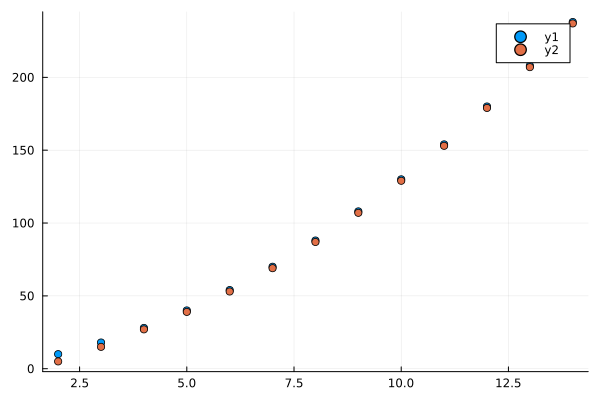

In [4]:
plot(n_min:n_max, df.next_exp_dim, seriestype=:scatter)
plot!(n_min:n_max, df.next_secant_dim, seriestype=:scatter)

In [ ]:
df

In [ ]:
n_min = 2;
n_max = 14;
@polyvar X[1:n_max];

restart = false; # set this to true in order to overwrite results of previous computations and start from scratch
initdf = DataFrame(:n=>Int[], :max_nondefective_rank => Int[], :max_nondefective_secant_dim=>Int[], :next_exp_dim =>Int[], :next_secant_dim=>Int[], :parameter_counting_rank => Int[]);
df = initdf;
if isfile(filepath_csv)
    df = DataFrame(CSV.read(filepath_csv, DataFrame))
    if restart || (size(df, 1) == 0)
        df = initdf;
        CSV.write(filepath_csv, df)
    end
else 
    CSV.write(filepath_csv, df)
end
is_secant_dim_computed(i) = i∈df.n

for i = n_min:n_max
    # check if the values have already been computed before
    if is_secant_dim_computed(i)
        continue;
    end
    dim, exp_dim, m, A, B = secant_tangent_dimension_general(i, X[1:i])

    M = length(monomials(X[1:i], 1:2));
    N = length(monomials(X[1:i], d));
    dim, exp_dim, m = 0, 0, 0
    new_row = DataFrame();
    A, B =  SparseMatrixCSC{Float64, Int64}, SparseMatrixCSC{Float64, Int64}
    while dim == exp_dim
        max_nondef_rank = m;
        max_nondef_secant_dim = dim;
        m += 1;
        dim, exp_dim, m, A, B = secant_tangent_dimension_general(i, X[1:i], m);
        new_row = DataFrame(:n=>[i], :max_nondefective_rank => [max_nondef_rank], :max_nondefective_secant_dim=>[max_nondef_secant_dim], :next_exp_dim =>[exp_dim], :next_secant_dim=>[dim], :parameter_counting_rank =>[Int(floor(N/M))])
    end
    append!(df, new_row)
    CSV.write(filepath_csv, new_row; append=true)
end
